# Strategic analysis and optimization of sales performance for "Pens and Printers" new product line

## 1. Executive summary

This report encapsulates a critical six-week analysis following the launch of "Pens and Printers'" new stationery product line. Our in-depth examination centered on evaluating various sales methodologies - Email, Call, and their combination - to determine their effectiveness in revenue generation. The analysis revealed that the 'Email and Call' method significantly outperforms others in terms of Average Revenue Per Sale (ARPS), a key metric identified for ongoing performance monitoring. These findings are instrumental in shaping strategic recommendations aimed at enhancing sales methodologies, boosting revenue, and setting a precedent for future product initiatives in the competitive market.

## 2. Introduction

The stationery products market is marked by intense competition and evolving consumer preferences, presenting both challenges and opportunities for "Pens and Printers." In response to the launch of their new product line, this report delves into a comprehensive analysis of sales data over the initial six-week period. Our objective was to dissect and understand the impact of different sales strategies on market penetration and revenue generation. The approach involved a rigorous validation and cleaning of the data, followed by an exploratory analysis to identify patterns, trends, and financial implications of each sales method. This report unfolds our methodological journey, setting the stage for the detailed findings and strategic insights that follow.

## 3. Sales methodologies overview

The analysis focused on three distinct sales methods for the new product line:

- **Email:** 2 emails to customers, the initial launch email and a follow-up after 3 weeks, requiring minimal team effort
- **Call:** direct phone call to customers by the sales team, averaging 30 minutes per call
- **Email and call:** combines a preliminary product information email with a subsequent sales call about 1 week later, each call lasting around 10 minutes

## 4. Data validation

### 4.1 Basic EDA overview

- The dataset has 15'000 entries and 8 columns containing numeric and categorical variables
- Columns: 'week', 'sales_method', 'customer_id', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits' and 'state'
- There are no negative values within the numeric variables
- 'revenue' column has 1074 missing values

A rigorous process was undertaken to ensure the integrity and usability of the data. Below are the validation and cleaning steps applied to each column in the dataset.

### 4.2 'week'

- Data type object (dtype): 'int64', appropriate for week numbers
- Missing values: 0 found
- Checked if the range of week column values is within 1-6 weeks (new product line launched 6 weeks ago): true

### 4.3 'sales_method'

- Data type object (dtype): 'object' (denoted as 'O'), suitable for categorical data
- Missing values: 0 found
- Variations and/or typos of the expected categories ('Email', 'Call', 'Email and call') have been found ('Email + Call', 'em + call', 'email'). Cleaned the data by mapping the unexpected sales methods to the correct expected categories. Variations have been standardized to the expected categories

### 4.4 'customer_id'

- Data type object (dtype): 'object' (denoted as 'O'), appropriate for alphanumeric identifiers with hyphens
- Missing values: 0 found
- Confirmed with a regular expression that all entries are strings with length of 36 and match UUID pattern
- Checked if customer identifiers are unique: 15'000 matches, therefore unique and one sale per customer

### 4.5 'nb_sold'

- Data type object (dtype): 'int64', correct for integer quantities of sold items
- Missing values: 0 found
- All values are non-negative, which is expected for sold items count
- Values range from 7 to 16, which is plausible

### 4.6 'revenue'

- Data type object (dtype): 'float64', suitable for numerical values with decimals
- Missing values: 1074 found (NaN)
- There are no negative values within non-missing values, as expected for revenue
- All-non missing entries are rounded to 2 decimal places, as expected
- The values range from 32.54 to 238.32, which is plausible
- Missing values can be handled in many options which include leaving them as they are, removing them or via imputation (i.e. mean/median/mode)
- A deeper analysis of the missing values is present in the EDA, but given the lack of clear information about the nature of the missing values and the importance of maintaining data accuracy in financial metrics, I did not consider the missing values when analyzing revenue, but I kept the rows with missing entries when analyzing the relationship among other columns. This approach allowed for an analysis that respects data integrity and provides a clear picture of the dataset's actual state

### 4.7 'years_as_customer'

- Data type object (dtype): 'int64',  correct and suitable for years
- Missing values: 0 found
- There are no negative values
- Found 2 anomalies (63 and 47 years) presenting entries grater than the maximum allowed which is 39 years (years passed from company foundation in 1984 to current year). For data integrity and to preserve the overall distribution and trends within the data, I assumed that the most likely cause was a data entry error. The most practical approach, which also minimizes data distortion when compared to other methods such as imputation, was to assign the value 39 to both entries, which is the cap. This method was easy to understand and justify. No customer relationship is indicated as longer than the company's existence after cleaning
- The values now range from 0 to 39 years, where 0 represents a new customer for the company

### 4.8 'nb_site_visits'

- Data type object (dtype): 'int64', appropriate for representing counts like website visits
- Missing values: 0 found
- There are no negative values
- The values range from 12 to 41 visits, which seems truthful and does not suggest any obvious anomalies

### 4.9 'state'

- Data type object (dtype): 'object' (denoted as 'O'), correct format for textual data like state names
- Missin values: 0 found
- The format on the entries is consistent (created a list of US states for comparison, checked for state names standardization, checked if all states are present
- There are 50 unique values, no indications of misspellings or inconsistencies

## 5. Exploratory data analysis

### 5.1 Unique customers count per sales method

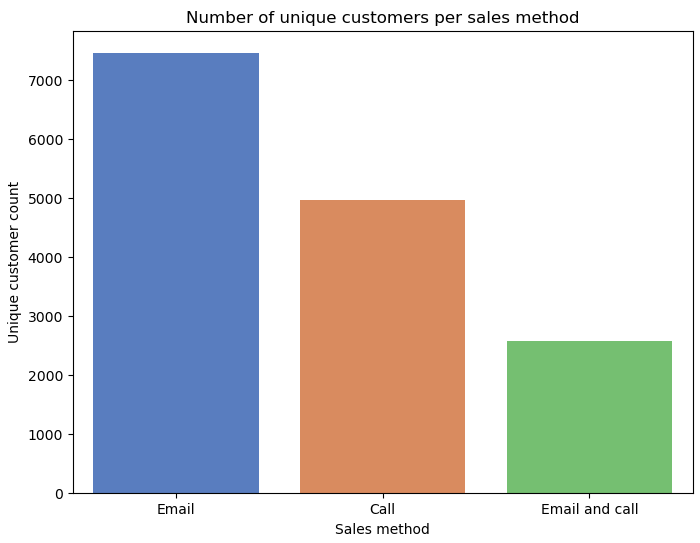

#### 5.1.1 Q1: How many customers were there for each approach?

- 7466 unique customers have been reached by 'Email'
- 4962 unique customers have been reached by 'Call'
- 2572 unique customers have been reached by 'Email and call'

### 5.2 Revenue distribution (original vs imputation)

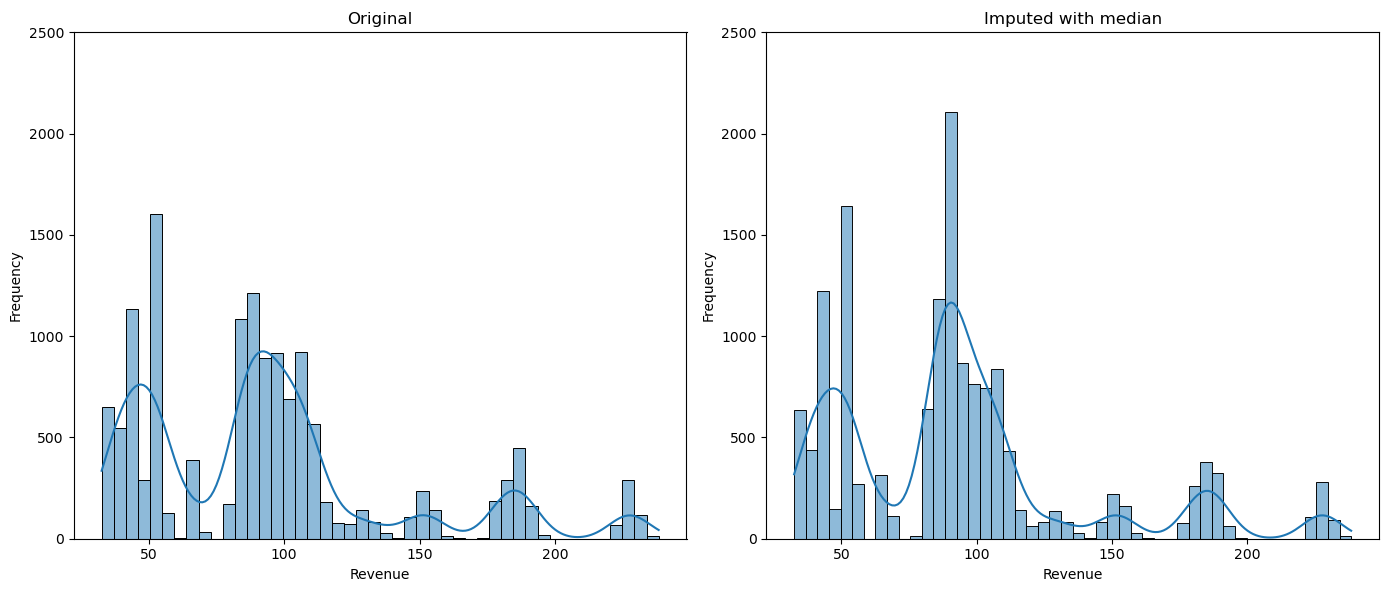

- The visualization shows the distribution of revenue in different scenarios: original distribution of revenue without considering the missing values (NaN not considered nor shown) and second distribution where NaN values have been replated by imputation with median, which is the best alternative for skewed distributions when compared to mean and mode)
- Both distributions seem to have a similar overall shape, suggesting that imputation hasn't drastically altered the data's distribution. However, the spike at the median value in the imputed plot indicates the added data points

### 5.3 Revenue missing values

#### 5.3.1 Revenue missing values count by sales method

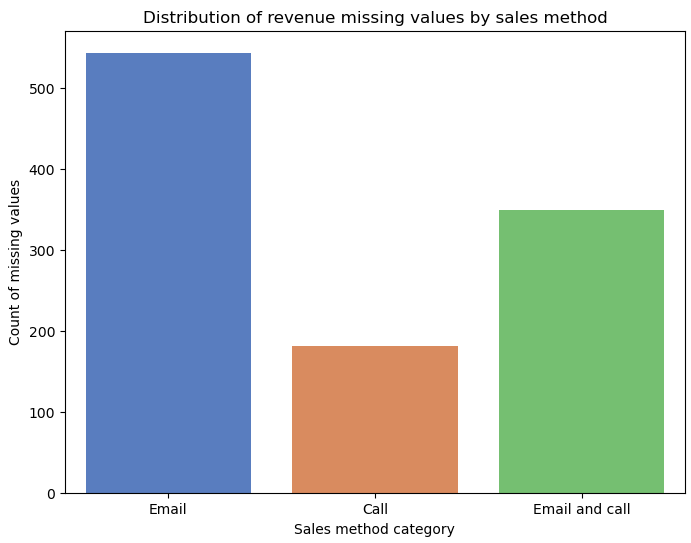

- 544 missing revenue values for 'Email' sales method
- 181 missing revenue values for 'Call' sales method
- 349 missing revenue values for 'Email and call' sales method

#### 5.3.2 Missing vs non-missing revenue count by sales method (stacked)

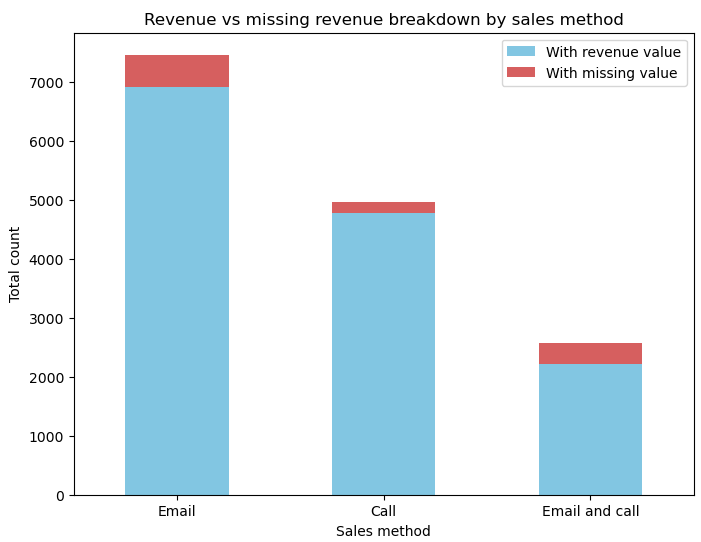

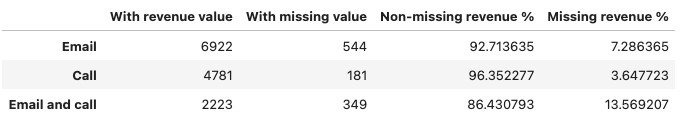

- The % of missing values varies significantly among sales method, with 'Email and call' notably higher
- The missing data could skew the results, especially if the reason is not random
- A sensitivity and correlation analysis on the original vs imputed of section 5.2 useful for the above plot suggests that when compared to other variables (nb_site_visits, nb_sold, revenue, week, years_as_customer) the overall shape distribution is similar (expect for the media value spike for the imputed), the mean and std are slightly lower for the imputed, and the 25% and the 75% quartiles show minor differences

### 5.4 Spread of revenue

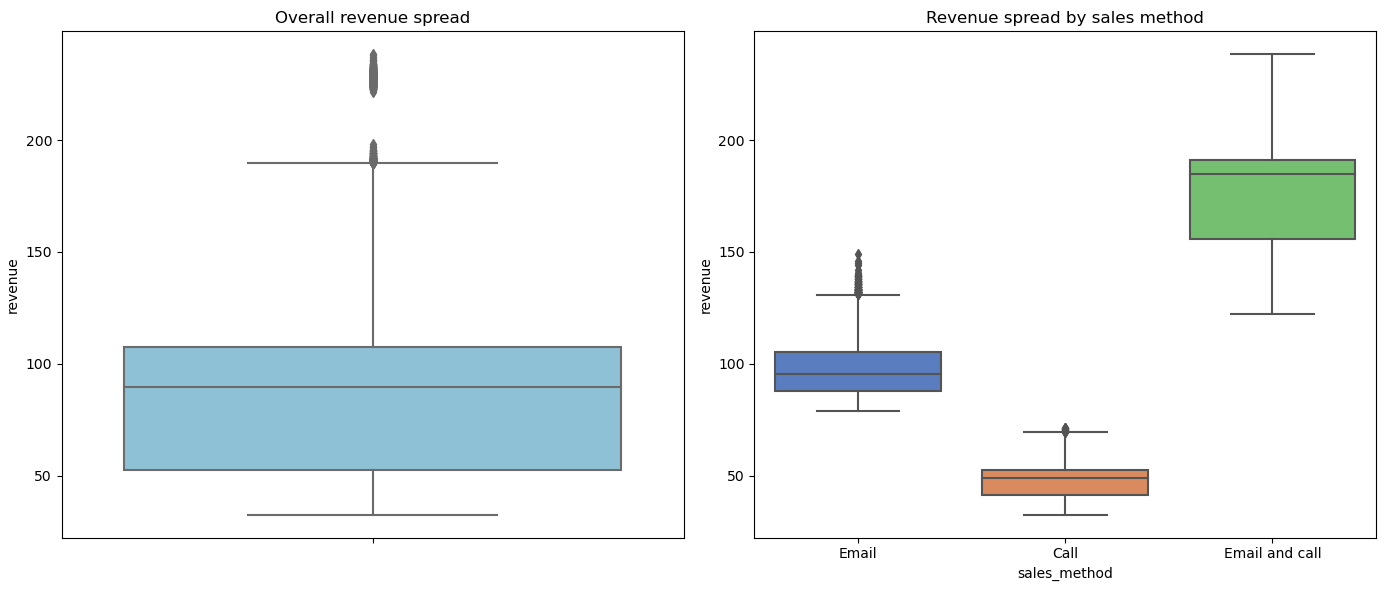

Descriptive statistics for overall revenue:

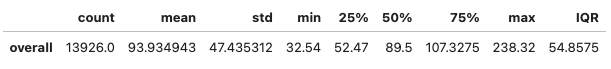

Descriptive statistics for revenue by sales method:

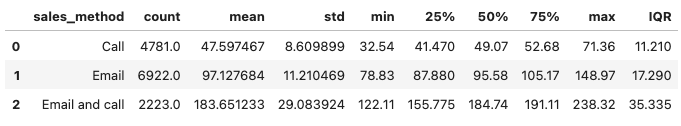

#### 5.4.1 Q2: What does the spread of the revenue look like overall? And for each method?

**Considerations for overall 'revenue' spread:**

- Overall revenue has a considerable spread (IQR method) of 54.85
- The value range is from 32.54 to 238.32, indicating diverse revenue amounts across all revenues
- Median is 89.50, which suggests that half of the sales transactions generate less than this amount
- IQR, from 52.47 to 107.33, captures the middle 50% of the revenue data
- There is a significant numbe of outliers, particularly on the higher end, which indicates that there are several instances where revenue is exceptionally high

**Considerations for revenue spread by sales method:**

- 'Email': broather IQR than 'Call' but narrower than 'Email and call' (moderate variability in revenue). Median value is higher than the 'Call' method (95.58 vs 49.07), meaning email method generates typically more revenue per sale. Outliers are present indicating occasional higher revenue sales
- 'Call': smallest IQR among the sales methods, indicating more consistent sales outcomes. Median revenue is the lowest with 49.07 (less revenue per sale). Fewer outliers compared to 'Email' sales method
- 'Email and call': widest IQR, showing the greatest variability in revenue among the three methods. Highest median revenue (184.74), which indicates its potential to generate high revenue per sale. The spread presents high-revenue values, suggesting that the combined method is effective
- All in all, 'Email and call' sales method performs better even if it has the widest IQR

### 5.5 Correlation analysis (heatmap)

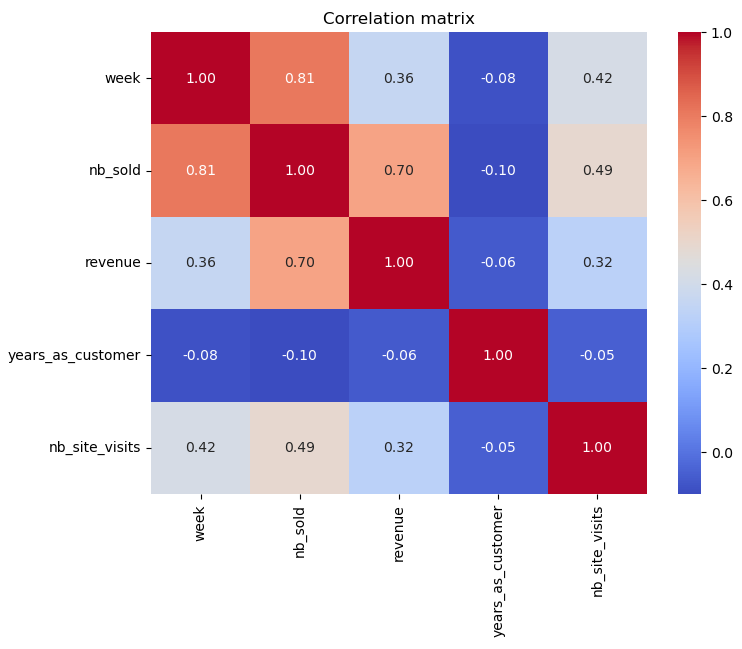

- Correlation between 'nb_sold' and 'revenue' is positive and strong, as expected (more sales higher revenue)
- Correlation between 'nb_sold' and 'week' is positive and strong (might be due do an initial ramp-up phase where sales are increasing week by week)
- Correlation between 'nb_site_visits' and both 'revenue' and 'nb_sold' is positive and moderate (more site visits might be associated with higher sales and revenue, indicating potential customer engagement)
- Correlation between 'years_as_customer' and 'revenue' is weak and negative (new customers might be generating more revenue initially)

### 5.6 Sales method impact over time

#### 5.6.1 Grouped analysis by sales method (overall)

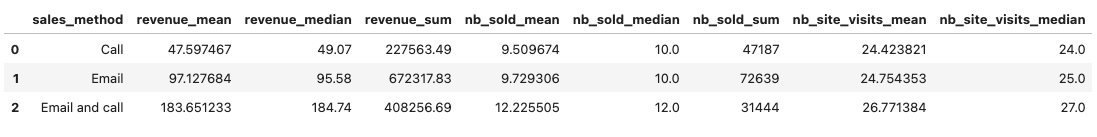

- The dataframe at the start of the sales method impact over time section clearly shows how 'Email and call' outperforms both 'Email' and 'Call' sales methods in terms of average revenue, median revenue, number of products sold and number of site visits
- 'Email' led to the highest total revenue due to the larger number of transactions made (same conclusion for the total sum of products sold)

#### 5.6.2 Revenue relationships and revenue over time

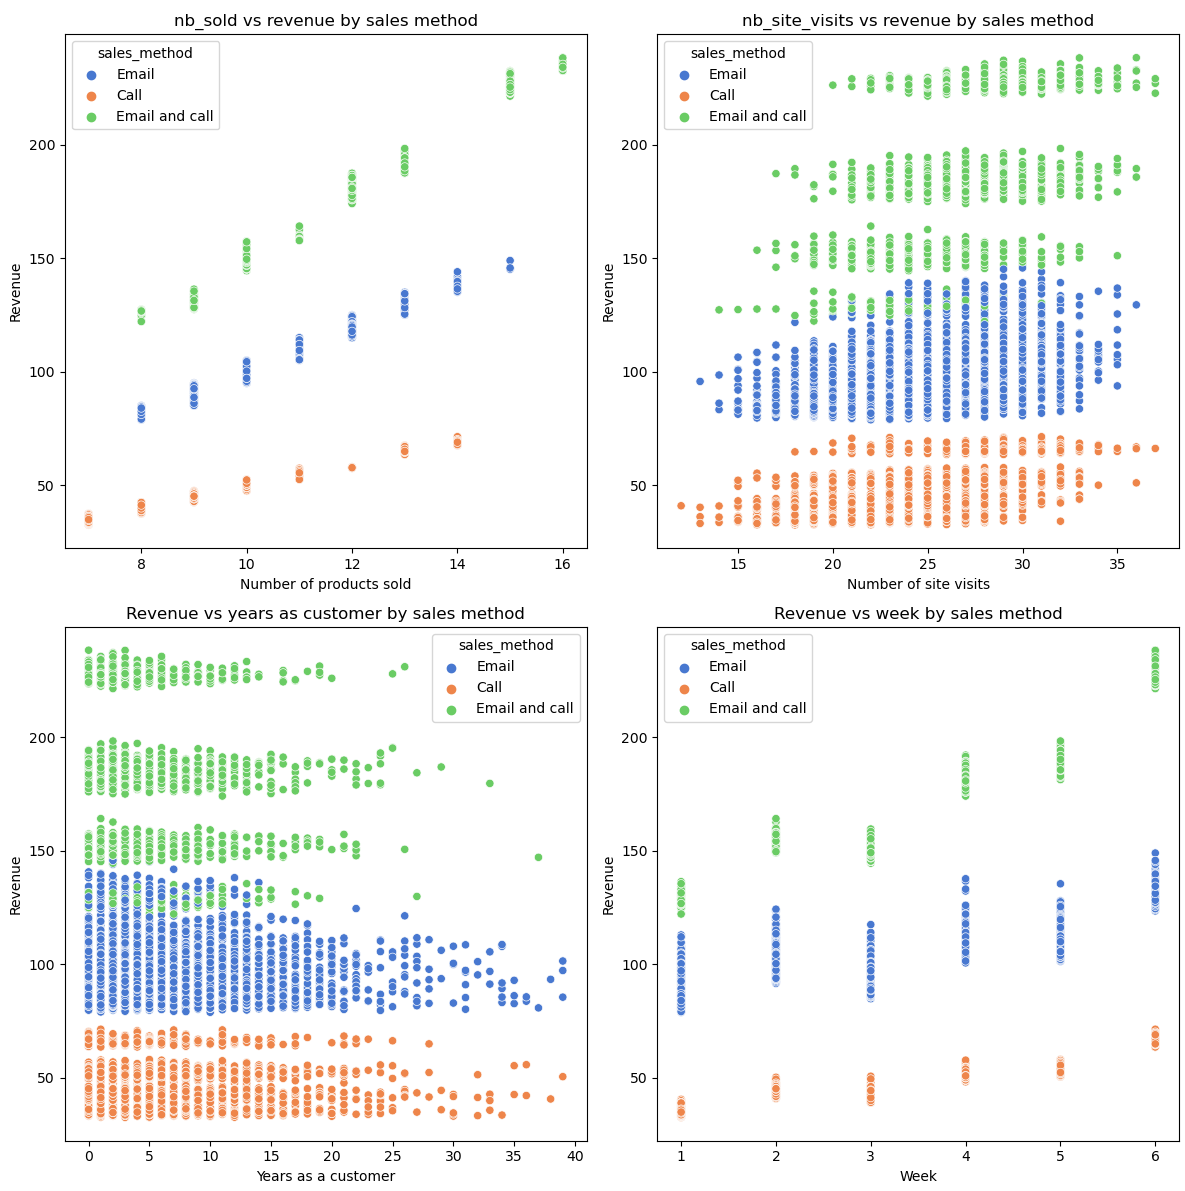

- Revenue vs units sold: positive relationship, 'Email and call' has the highest revenues at all units sold levels (more effective)
- Revenue vs site visits: 'Email and call' is the highest revenue sales method
- Revenue vs years as customer: 'Email and call' confirms better revenue generation compared to other sales methods
- Revenue vs week: slight positive relationship, 'Email and call' is again the best performer

#### 5.6.3 Total revenue and total number of products sold over time by sales method

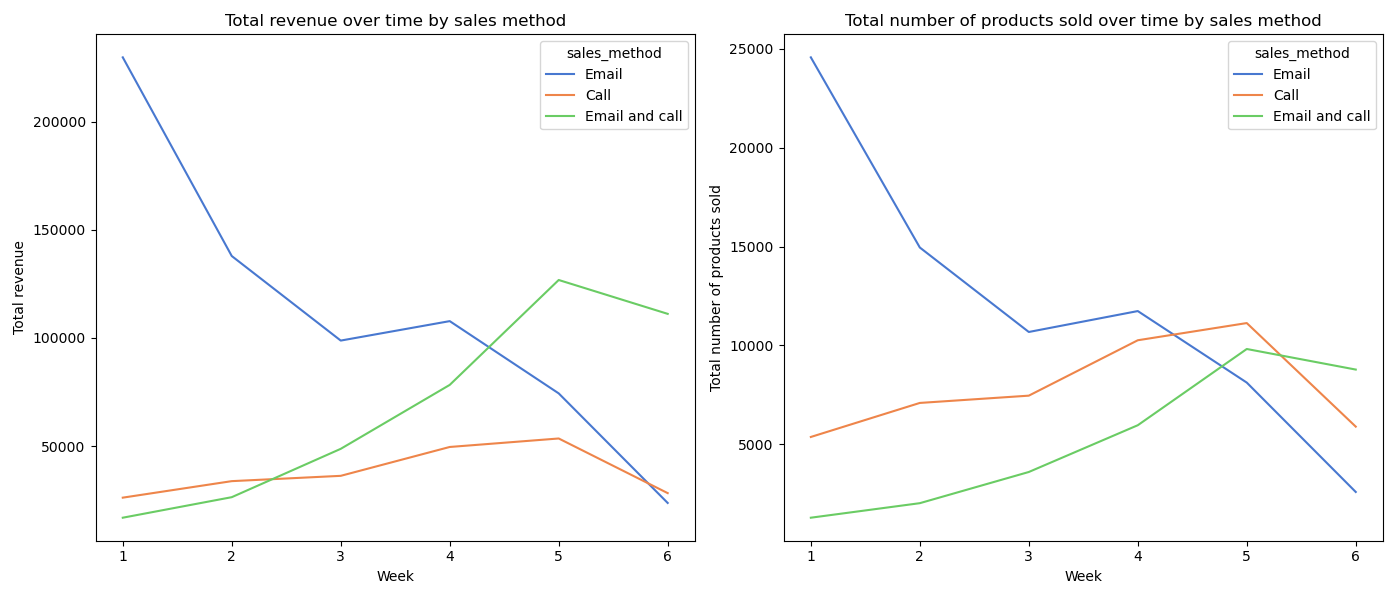

- Revenue trends over time for each sales method vary notably WOW. 'Email' method performance has been drastically decreasing WOW, 'Call' generally shows lower revenue than other methods, 'Email and call' shows a significant increase WOW, suggesting its effectiveness in generating higher revenue per sale (number of units sold leads to the same conclusion)

#### 5.6.4 Mean revenue over time by week and sales method

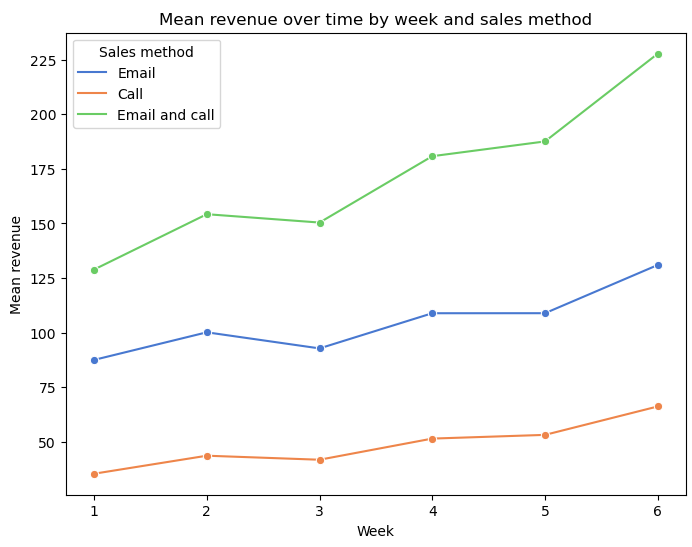

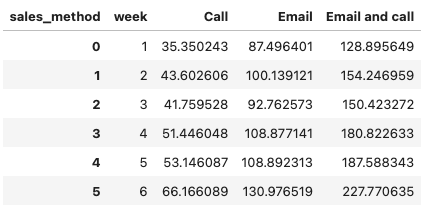

#### 5.6.5 Q3: Was there any difference in revenue over time for each of the methods?

**Revenue by week and sales method:**

- There is a slight positive relationship between revenue and week
- 'Email and call' has the highest revenue customers in all weeks, meaning it is more effective and has the best performance when compared to 'Email' and 'Call' methods
- The difference in revenue is clear and 'Email and call' is the best method

**Total revenue and total number of products sold over time by sales method**:

- The insights gained from the trends underlines that a strategic focus on 'Email and call' method for future sales initiatives could be advisable, particularly when aiming to maximize revenue and sales volume
- The 'Email and call' method appears to capitalize on the strenghts of both individual sales methods, prividing both reach and personalized engagement, which seems to resonate effectively with customers
- The difference in revenue is clear and 'Email and call' is the best method

**Mean revenue by week and sales method**:

- There is a consistent increase in mean revenue over the weeks for 'Email and call', while 'Call' and 'Email' show a slight increase
- 'Email and call' outperforms the other two methods in terms of mean revenue per week
- Once again the effectiveness of the combined approach suggests that the personal touch of a call coupled with the efficiency of an email contriubtes to higher customer spend
- The difference in revenue is clear and 'Email and call' is the best method

**Worth considering:**

- The fact that the 'Email and call' sales method consist in a moderate effort (product information email sent and subsequent 10 minutes call), coupled with the fact that it is the best performing sales method, suggest that the increased revenue and engagement justifies the effort, consistently producing higher revenues and sales volumes when compared to 'Email' and 'Call' methods. The 'Email and call' mix offers the best balance between personalized engagement and reach, capitalizing and synergizing on the strengths of both individual sales methods

## 7. Further customer segmentation

### 7.1 Group by state and sales method insights

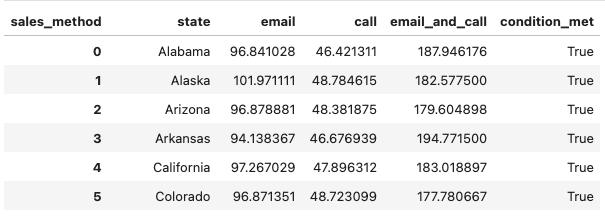

- Checked that in all states that the mean of 'Email and call' is greater than 'Email', which is greater than 'Call': true
- (image is cut on purpose as it is too long)

### 7.2 By purchase volume and site engagement level

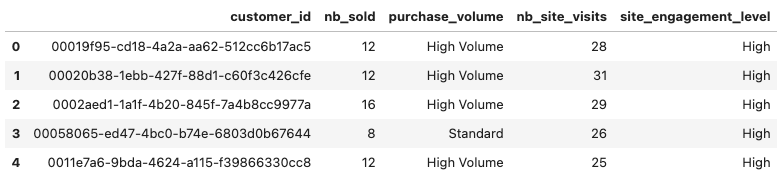

- For 'purchase_volumne', assigned 'High Volume' if nb_sold > median_nb_sold, otherwise 'Standard'
- For 'site_engagement_level', assigned 'High' if nb_site_visits > mean_nb_site_visits, otherwise 'Low'
- (image is cut on purpose as it is too long)

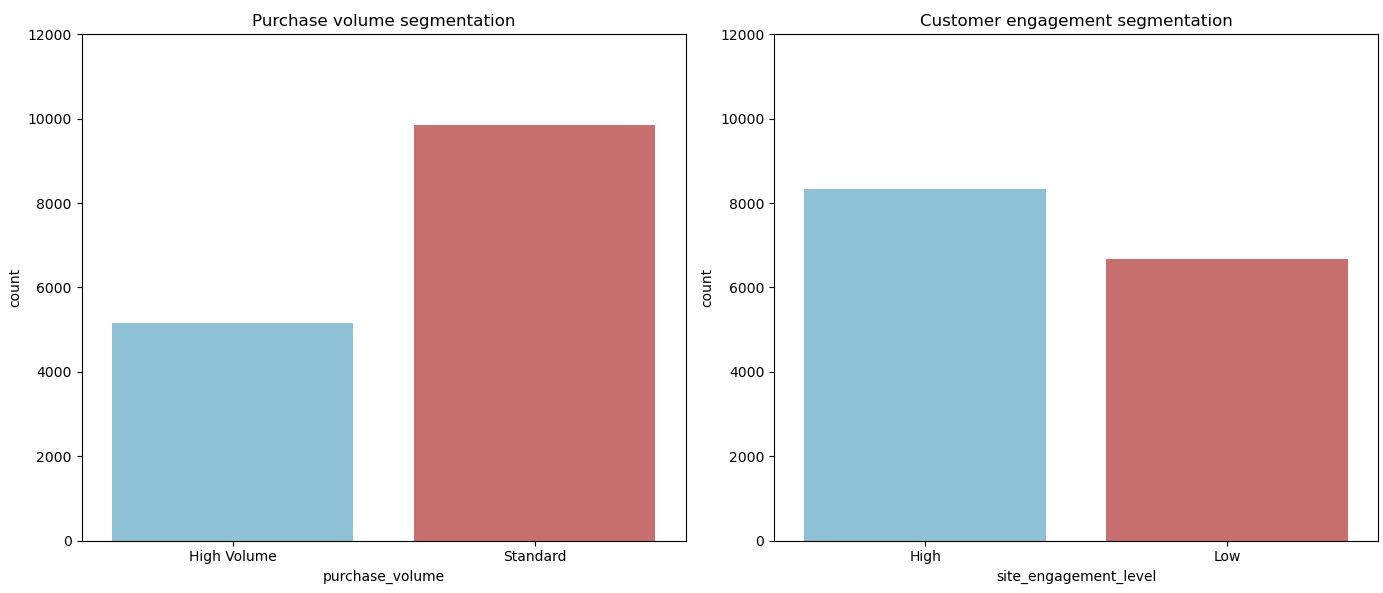

**Considerations for purchase volume segmentation:**

- Distribution of customers into 'High Volume' and 'Standard' buyers, based on the total number of products purchased by each customer in comparison to the median
- 34.33% of customers buy at least 10 items (median), 65.67% buy less

**Considerations for site engagement level segmentation:**

- Distribution of customers into 'High' and 'Low' customers, based on the n. of site visits in comparison to the average
- 55.56% of customers have visited the website more than the average, which is 24.99 times, 44.44% visited less

### 7.3 By geographical location (customer count and units sold)

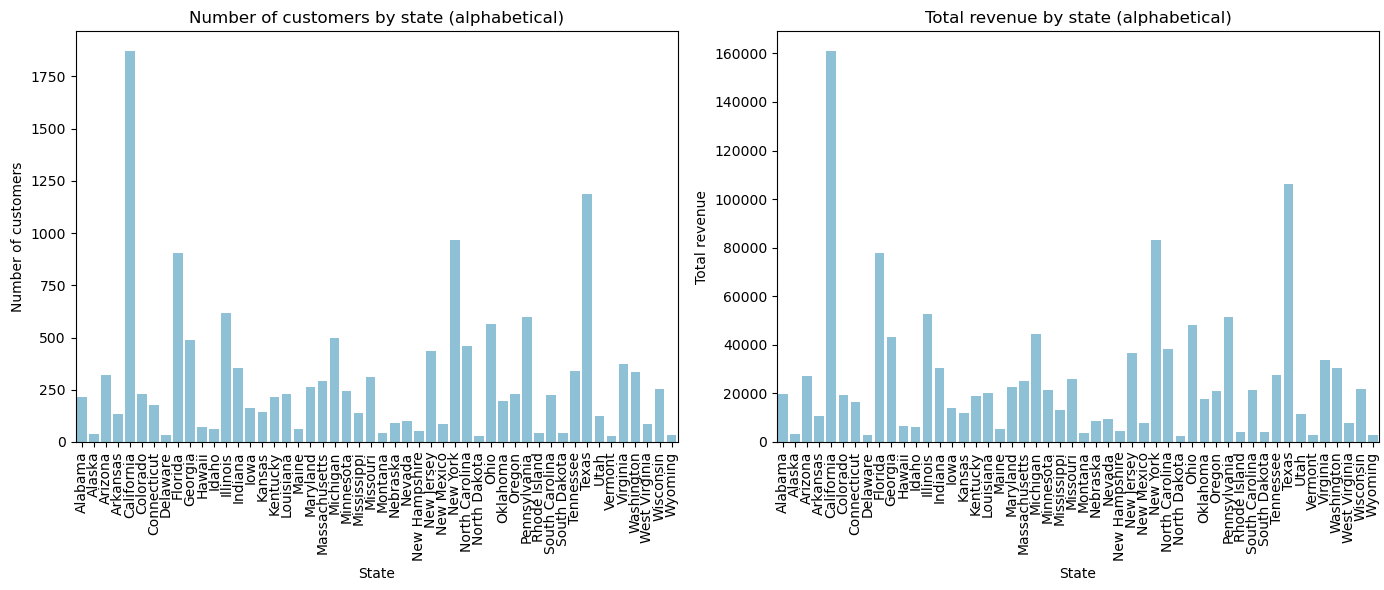

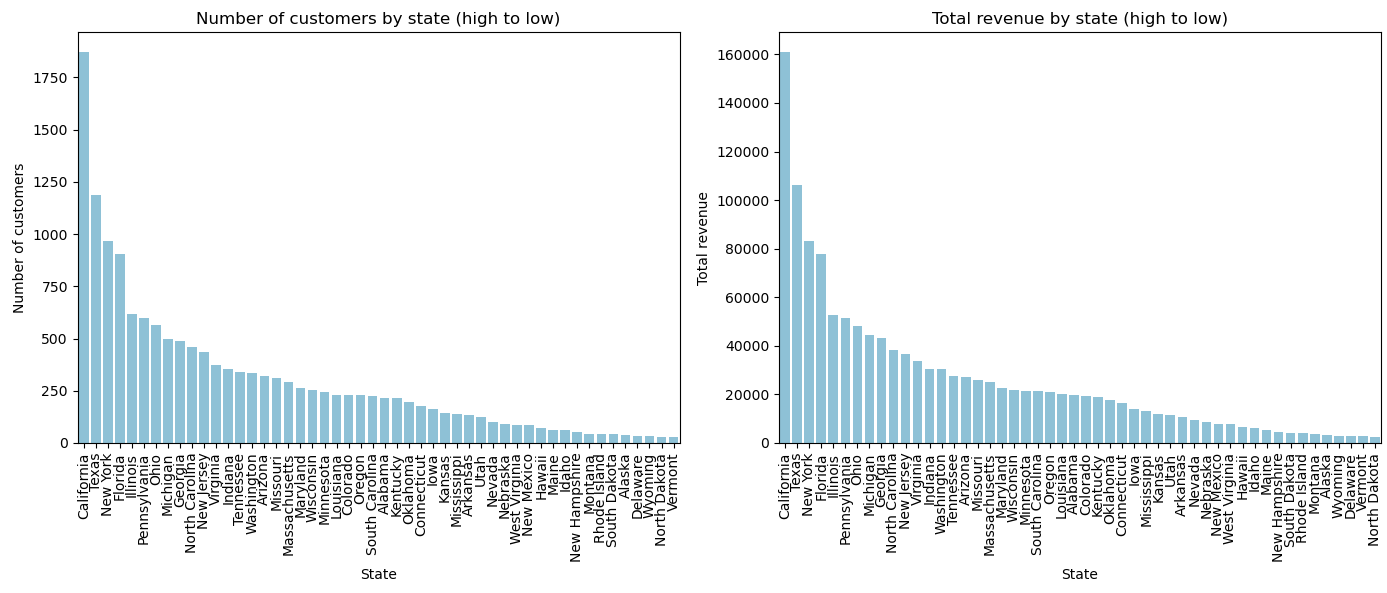

Top 10 states by number of customers with cumulative percentage:

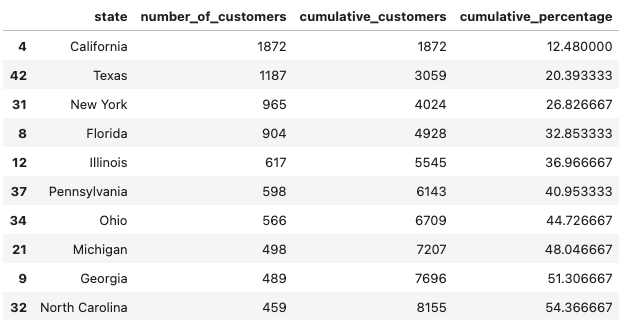

Top 10 states by revenue with cumulative percentage:

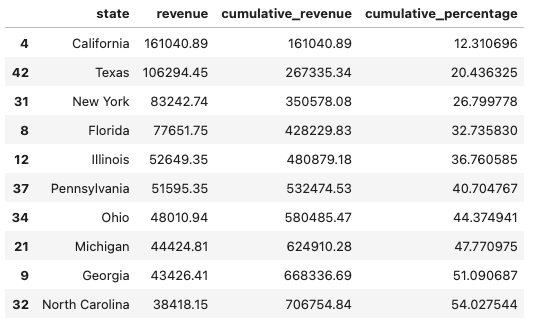

**Considerations for top 10 states by number of customers:**

- California has the highest number of customers (1872) with a substantial lead over the seconda state, Texas, with 1187
- The cumulative customer count and percentage show that 26.82% of the customer base is from California, Texas or New York, and that 51.31% of the customers are based in 9 states out of 50 in the US
- While the company might focus on the top-performing states to leverage the existing customer base for growth, untapped potential in states with fewer customers is a strong opportunity to increase market share
- With the information provided, we don't know why some states have fewer customers: it could be due for example to less effective marketing, stronger competition, or perhaps a lower demand for company products

**Considerations for top 10 states by revenue:**

- California leads by a significant margin in total revenue, followed by Texas and New York (suggests a heavy concentration of revenue in a few key states similar the the number of customers by state)
- The cumulative revenue and percentages illustrate that 26.8% of the revenue is from California, Texas and New York, and that 51.09% of the revenue comes from 9 states out of 50 in the US
- Once again, states contributing lower revenue could represent untapped markets or areas where the company has less market penetration
- The data can inform where to focus marketing and sales efforts, perhaps investing more resources into high-revenue states to capitalize on existing strongholds or developing strategies to increase the customer spend in states with many customers but lower revenue

### 7.4 Statistical experimentation

**Approach:**

- Compare the impact of sales method (categorical) on, one at a time, revenue (continuous), units sold (discrete), number of site visits (discrete) and years as customer (discrete)
- Analysis of variance (ANOVA) to determine if statistically significant, if yes, Tukey's HSD test to identify which sales methods are significantly different from each other
- H0: there is no significant difference in the mean **variable** among the different sales methods
- H1: there is a significant difference in the mean **variable** among at least one pair of sales methods

**Results interpretation:**

- Reject H0 and accept H1 when the p-value of the test is below the threshold of significance (here 0.05)
- If H0 is rejected, meaning that there is a significant difference in the mean variable amon at least one pair of sales methods, Tukey HSD is inspected
- If Tukey HSD is rejected there is a significant difference between the two sales methods, if not there is no significant difference

**Sales methods and years as customer:**

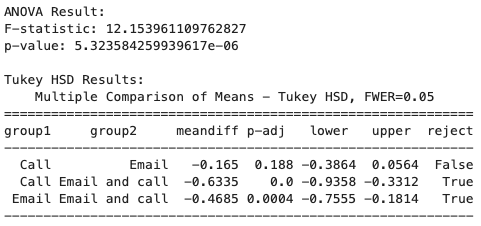

**Results summary for all ANOVA tests:**

- When comparing the impact of sales method vs revenue, number of units sold and the number of site visits, the ANOVA test always rejected H0, and the Tukey HSD always showed that among all 3 sales methods (analyzed in pairs), the rejection was true once again. In other words, there was always a clear difference in the mean of the variables across the different sales methods
- For what concerns sales methods and years as customer on the other hand, the ANOVE test rejected H0 (as shown above), but the Tukey HSD outcome stated that there was a difference in the mean of years as customer across the different sales methods, except when comparing 'Call' and 'Email' (reject false)

### 7.5 Q5: Differences between the customers in each group

**Q5: We don’t really know if there are other differences between the customers in each group, so anything you can tell us would be really helpful to give some context to what went well.**

The analysis reveals several key insights into customer segmentation, geographical distribution, and the impact of different sales methods on various aspects of the business:

**Customer segmentation:**

- By purchase volume: we segmented customers into 'High Volume' and 'Standard' buyers based on the total number of products purchased. Approximately 34.33% of customers buy at least 10 items (median), while 65.67% buy fewer products
- By site engagement level: customers were categorized as 'High' or 'Low' based on their website visit frequency. About 55.56% of customers visit the website more than the average (24.99 times), while 44.44% visit less frequently

**Geographical distribution:**

- Number of customers by state: California stands out with the highest number of customers (1872), followed by Texas with 1187. The top three states, including New York, make up 26.82% of the customer base, while 51.31% of customers are concentrated in just 9 out of 50 states
- Total revenue by state: California leads in total revenue, indicating a concentration of revenue in a few key states. Similar to customer count, 26.8% of revenue comes from California, Texas, and New York. This suggests potential untapped markets in states with fewer customers and revenue

**Impact of sales methods on revenue:**

- Statistical experimentation: an ANOVA test demonstrates a significant difference in mean revenue among different sales methods, and Tukey HSD tests confirm that all pairs of sales methods have significantly different mean revenues. In summary, there are significant differences in revenue among the sales methods
- The company's approach to sales has a tangible effect on the overall revenue generated

**Impact of sales methods on number of units sold and site visits:**

- Similar to the revenue analysis, both the number of units sold and site visits also show significant differences among the sales methods, as confirmed by ANOVA and Tukey HSD tests
- The choice of how the company interacts with customers affects their buying behavior
- The way sales are conducted can influence customers' interest in exploring the company's offerings online

**Impact of sales methods on years as a customer:**

- The ANOVA test suggests a significant difference in the mean number of years as a customer among at least one pair of sales methods. However, the Tukey HSD results reveal that the 'Call' vs. 'Email' comparison does not show a statistically significant difference, while 'Call' vs. 'Email and call' and 'Email' vs. 'Email and call' do

## 8. Business metric to monitor

### 8.1 Identify the best metric for "Pens and printers"

When thinking about potential business metrics that could be used for this analysis, some considerations about the data available are due:

- Incomplete data: data only shows successfull sales, but no missed opportunities (deals lost)
- New product bias: initial sales figures could be inflated to due initial interest
- Single transacton data: each customer in the dataset made only one purchase, providing no insight into repeated interactons

For the reasons above, **conversion rate** it not suitable.

- Short timeframe: with only 6 weeks of data on a new product, the history to predict future purchase behavior is somehow insufficient
- Single purchase pattern: single transaction per customer from dataset
- Lack of recurrence data: no repeated purchases or customer retention over time from dataset

For these reasons, **customer lifetime value** is not suitable.

**Given the constraints of the dataset and the nature of the metrics discussed, I believe that the best metric to implement would be the average revenue per sale (ARPS):**

- Uses available data on actual sales and revenue, providing a direct measure of financial performance per sales method (identifies the most lucrative sales method in terms of revenue)
- ARPS is immediately applicable and relevant for assessing the value generated from the current sales strategies without needing additional data points
- Offers actionable insights that can inform optimization of sales methods based on current revenue generation, guiding resource allocation and strategy adjustments

### 8.2 Average revenue per sale (ARPS) initial values

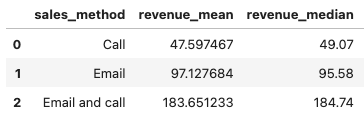

- The initial ARPS values set a benchmark for each sales method against which future performance can be measured
- Trends in ARPS should be taken into consideration over time
- The decision, according to the initial ARPS findings, is to focus on the 'Email and call' method due to higher ARPS, indicanting once again its effectiveness in generating more revenue per customer interaction
- As previousy stated, the effort associated with this method is not particularly demanding and offsets the time taken to send the email and the 10 minutes phone call
- If the revenue data is skewed, especially to the right (common in sales data due to a long tail of high-value sales), the ARPS can be calculated with the revenue median as it can provide a better sens of the "typical" revenue per sale (since it is not affected by outliers)

The final recommendation, therefore, is to monitor both the mean and median ARPS to provide a more complete picture. The initial values of the ARPS are shown in the dataframe above.

## 9. Final summary recommendations

### 8.1 Q4: What is the recommended method?

**Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar**

- Based on the comprehensive analysis of the sales data, I recommend the company prioritize the 'Email and call' method for future sales initiatives. This method has consistently demonstrated the highest median revenue, indicating its effectiveness in generating significant sales per customer. Furthermore, there's a clear positive trend over time in revenue performance, suggesting that its impact is growing. It is also associated with increased customer engagement, as evidenced by higher site visits, which are crucial for building long-term customer relationships and loyalty. While it requires more effort than the 'Email' method, the 'Email and call' approach yields a substantial number of high-revenue transactions, making it a strategically valuable option for capturing high-value customers across diverse markets. The method's alignment with the company's strategic sales goals (to maximize revenue and effectively engage customers) along with its demonstrated success across multiple metrics, strongly supports to prioritize its use despite the higher time investment it demands (only the compared to the 'Email' method)

**Breakdown of the 10 key characteristics of the 'Email and call' method:**

- **Superior revenue generation:** highest median and mean, suggesting higher sales per customer
- **Consistent performance improvement:** most positive trend WOW, suggesting improved efficacy WOW
- **Higher customer engagement:** correlates with more customer site visits, a proxy for engagement and often a precursor to higher conversion rates and customer loyalty
- **Capturing high-value transactions:** achieves greater number of high-revenue sales, making it strategically valuable
- **Effectiveness in states:** across different states the method yields to higher mean revenue
- **Volume of sales:** despite 'Email' results in the highest total number of transactions in the first six weeks, superior revenue per transaction of 'Email and call' suggests to be more efficient for the future
- **Cost-benefit justified:** additional time invested compared to 'Email' is offset by higher revenue outcomes
- **Customer purchase power:** increase number of products sold, the approach is more effective at influencing customer purchase decision
- **Long-term customer value:** method appears to resonate with both new and long-standing customers
- **Strategic alingment with sales goals:** if the team's goal in the long term is to maximize revenue the method aligns better with this objective due to higher revenue generation capability

**ARPS as the key usiness metric to monitor**

- Average Revenue Per Sale (ARPS) is the preferred metric for evaluating "Pens and Printers'" sales effectiveness because it measures the average monetary value each sale brings, rather than just counting the number of sales. This approach allows the company to focus on the profitability of sales strategies rather than volume alone, providing a more accurate reflection of financial performance and more importantly identifying the best sales approach on which to focus on to increase revenue in the medium and long term. By incorporating ARPS, "Pens and Printers" can prioritize sales methods that not only close deals but also enhance revenue, ensuring strategic decisions are aligned with revenue optimization goals

**Data quality improvement:**

Instances of missing revenue entries within the sales data, on top of anomalies in the name of the sales method categories and the number of years as customer, have been encountered during the analysis. To enhance the accuracy of future analyses and the integrity of our business metrics, I recommend the following:

- Implement a routing data valiation process to check for and address missing entries or discrepancies in real-time
- Provide additional training for the sales team on the importance of accurate data entry and the immpact of data quality on business decisions
- Consider introducing automated data entry systems with build-int validaton rules to minimize the potential for human error.

By addressing these data quality issues, "Pens and Printers" can ensure a more robust foundation for making informed strategic decisions and accurately measuring the effectiveness of sales methodologies